<a href="https://www.kaggle.com/code/elyamadad/titanic?scriptVersionId=202453651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-analysis/Titanic-Dataset.csv


### **Import Libraries**

In [2]:
# import required  packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # visualisation
import seaborn as sns # visualisation

import warnings

warnings.filterwarnings(action="ignore")

### **Uploading csv file¶**

In [3]:
df = pd.read_csv('/kaggle/input/titanic-analysis/Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# print shape (total number of rows and columns)

df.shape

(891, 12)

In [9]:
# print all columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
memory_used = df.memory_usage()

print(memory_used)

Index           128
PassengerId    7128
Survived       7128
Pclass         7128
Name           7128
Sex            7128
Age            7128
SibSp          7128
Parch          7128
Ticket         7128
Fare           7128
Cabin          7128
Embarked       7128
dtype: int64


In [11]:
total_memory_used = memory_used.sum()

print(total_memory_used)

85664


In [12]:
# TO SHOW memory usage in MB's use the following code

print("Total memory used in MB's")
total_memory_used / 1024 ** 2

Total memory used in MB's


0.081695556640625

In [13]:
# Check for null/missing values

missing_values = df.isnull()

# We can also use a different code to check missing values
# missing_values = df.isna()

missing_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
print(missing_values.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [15]:
# Check for duplicated rows

duplicated_values = df.duplicated()

print(duplicated_values)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


In [16]:
# Check for duplicated rows

print("Total duplicated values in dataset:")
print(duplicated_values.sum())

Total duplicated values in dataset:
0


In [17]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
# print value counts of columns

print(df["PassengerId"].value_counts())

# print new line to separate content
print("_____________________________________________________\n\n")

print(df["Sex"].value_counts())

print("_____________________________________________________\n\n")

print(df["Survived"].value_counts())

print("_____________________________________________________\n\n")

print(df["SibSp"].value_counts())

print("_____________________________________________________\n\n")

print(df["Cabin"].value_counts())

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
_____________________________________________________


Sex
male      577
female    314
Name: count, dtype: int64
_____________________________________________________


Survived
0    549
1    342
Name: count, dtype: int64
_____________________________________________________


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
_____________________________________________________


Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


In [19]:
#We can sort the parameter to ascending order..
df['SibSp'].value_counts(ascending = True)

SibSp
5      5
8      7
3     16
4     18
2     28
1    209
0    608
Name: count, dtype: int64

In [20]:
#descendig order
df['SibSp'].value_counts(ascending = False)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [21]:
#for slicing dataset...
#print only 10 rows
df.loc[0:9]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
# Subset DataFrame 
df.loc[: , ["PassengerId","Sex", "SibSp", "Age"]]

,PassengerId,Sex,SibSp,Age
0,1,male,1,22.0
1,2,female,1,38.0
2,3,female,0,26.0
3,4,female,1,35.0
4,5,male,0,35.0
...,...,...,...,...
886,887,male,0,27.0
887,888,female,0,19.0
888,889,female,1,NaN
889,890,male,0,26.0


In [23]:
#print both rows and columns then we use 'iloc'
#iloc print only integer numbers.
df.iloc[0:9 , 1:12]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [24]:
# Subset / Slice the DataFrame
# All rows and first 5 columns

df.iloc[:, 0:5]

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male
...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male
887,888,1,1,"Graham, Miss. Margaret Edith",female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,890,1,1,"Behr, Mr. Karl Howell",male


In [25]:
# select only int and float columns

df.select_dtypes(include = ["int", "float"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [26]:
df['Age'].min()

0.42

In [27]:
df['Age'].mean()

29.69911764705882

In [28]:
df['Age'].max()

80.0

In [29]:
df['Age'].skew()

0.38910778230082704

Survived
0    549
1    342
Name: count, dtype: int64

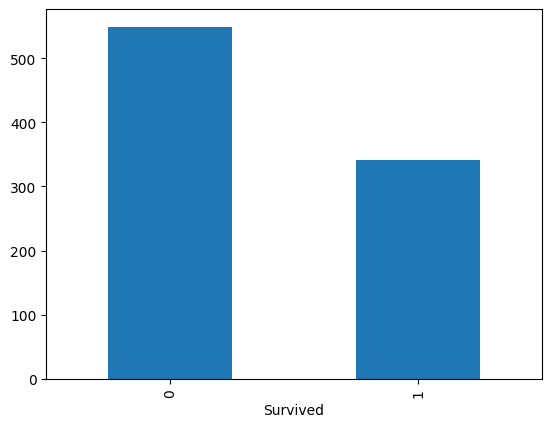

In [30]:
#sns.countplot(df['Survived'])
df['Survived'].value_counts().plot(kind='bar')
df['Survived'].value_counts()

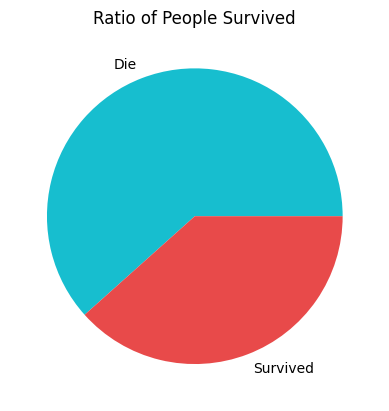

In [31]:
plt.pie(df["Survived"].value_counts(),labels = ["Die"
, "Survived"],colors = ["tab:cyan","#e84a4a"])

plt.title("Ratio of People Survived")
plt.show()

<Axes: ylabel='count'>

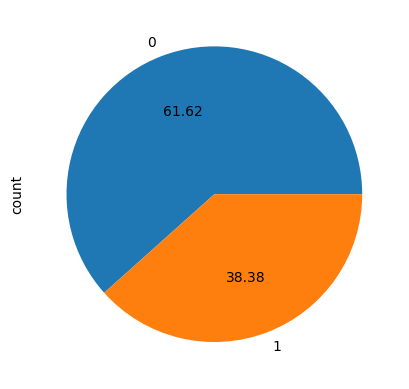

In [32]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f') #autopct show parcentage

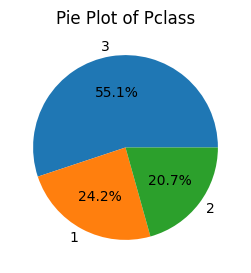

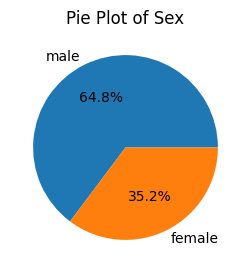

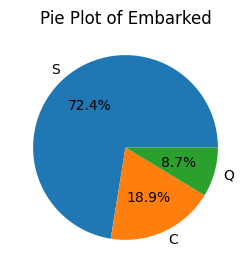

In [33]:
columns = ["Pclass", "Sex", "Embarked"]

for column in columns:
    plt.figure(figsize=(4, 3))
    counts = df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Plot of {column}')
    plt.show()

In [34]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

(array([ 50.,  21., 108., 140., 144., 101.,  52.,  48.,  28.,  15.,   5.,
          2.]),
 array([ 0.42      ,  7.05166667, 13.68333333, 20.315     , 26.94666667,
        33.57833333, 40.21      , 46.84166667, 53.47333333, 60.105     ,
        66.73666667, 73.36833333, 80.        ]),
 <BarContainer object of 12 artists>)

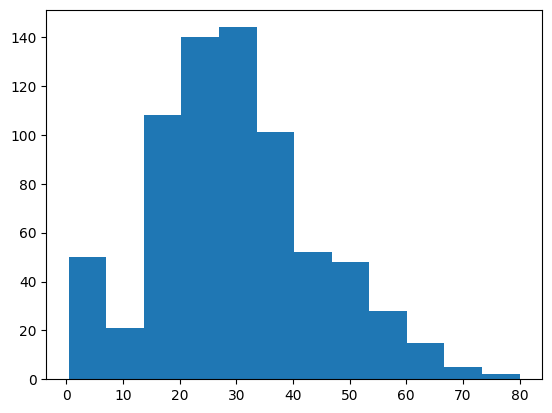

In [35]:
plt.hist(df['Age'],bins=12)

<Axes: xlabel='Age', ylabel='Density'>

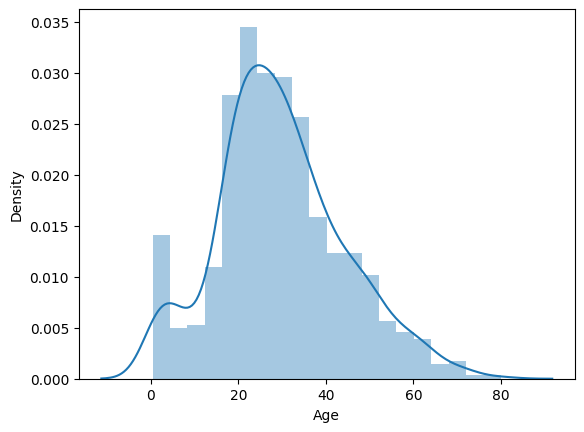

In [36]:
sns.distplot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

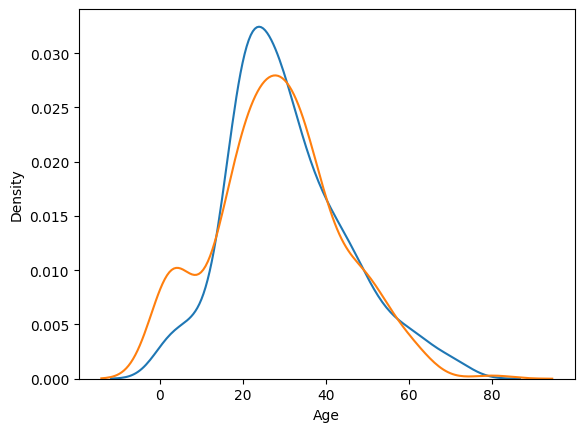

In [37]:
sns.distplot(df[df['Survived']==0] ['Age'],hist=False)
sns.distplot(df[df['Survived']==1] ['Age'],hist=False)

<Axes: xlabel='Pclass', ylabel='Age'>

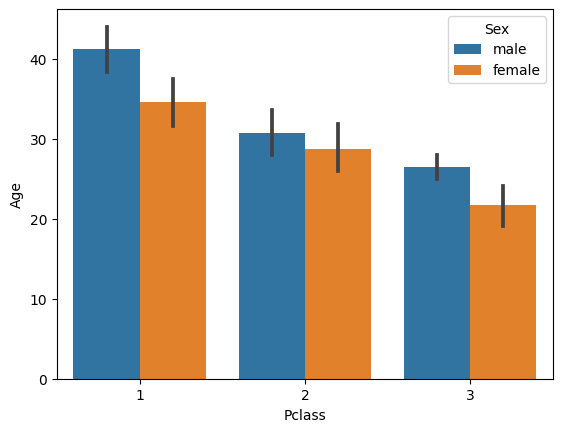

In [38]:
sns.barplot(x=df['Pclass'],y=df['Age'],hue=df['Sex'])

<Axes: xlabel='Sex', ylabel='Age'>

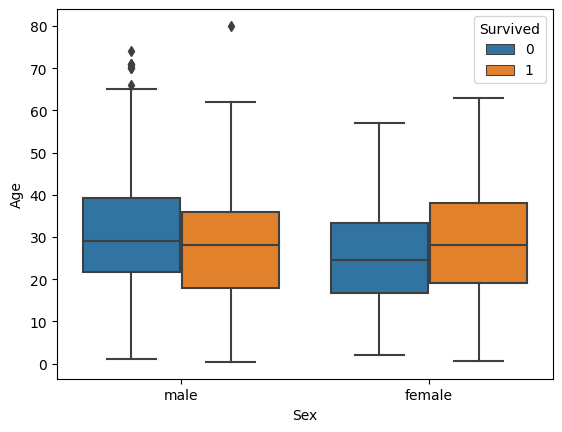

In [39]:
sns.boxplot(x=df['Sex'],y=df['Age'],hue=df['Survived'])

<Axes: >

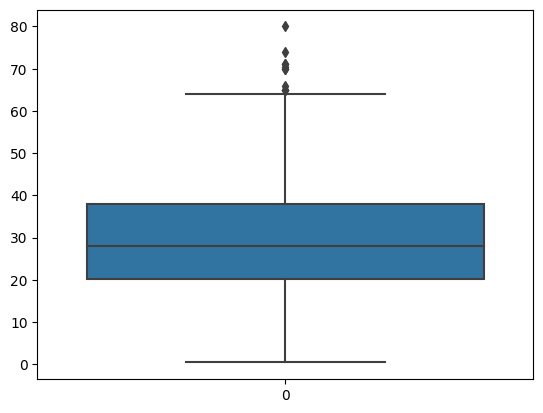

In [40]:
sns.boxplot(df['Age'])

In [41]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

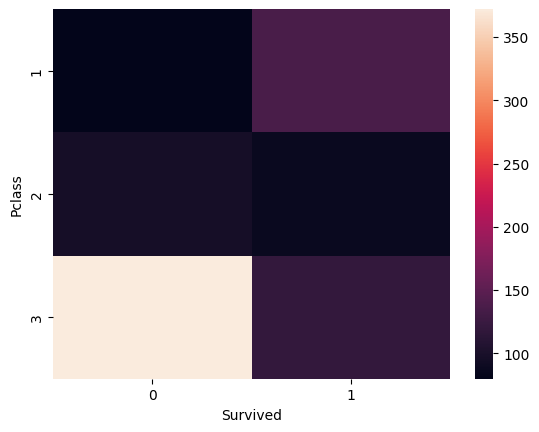

In [42]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

In [43]:
pd.crosstab(df['SibSp'],df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


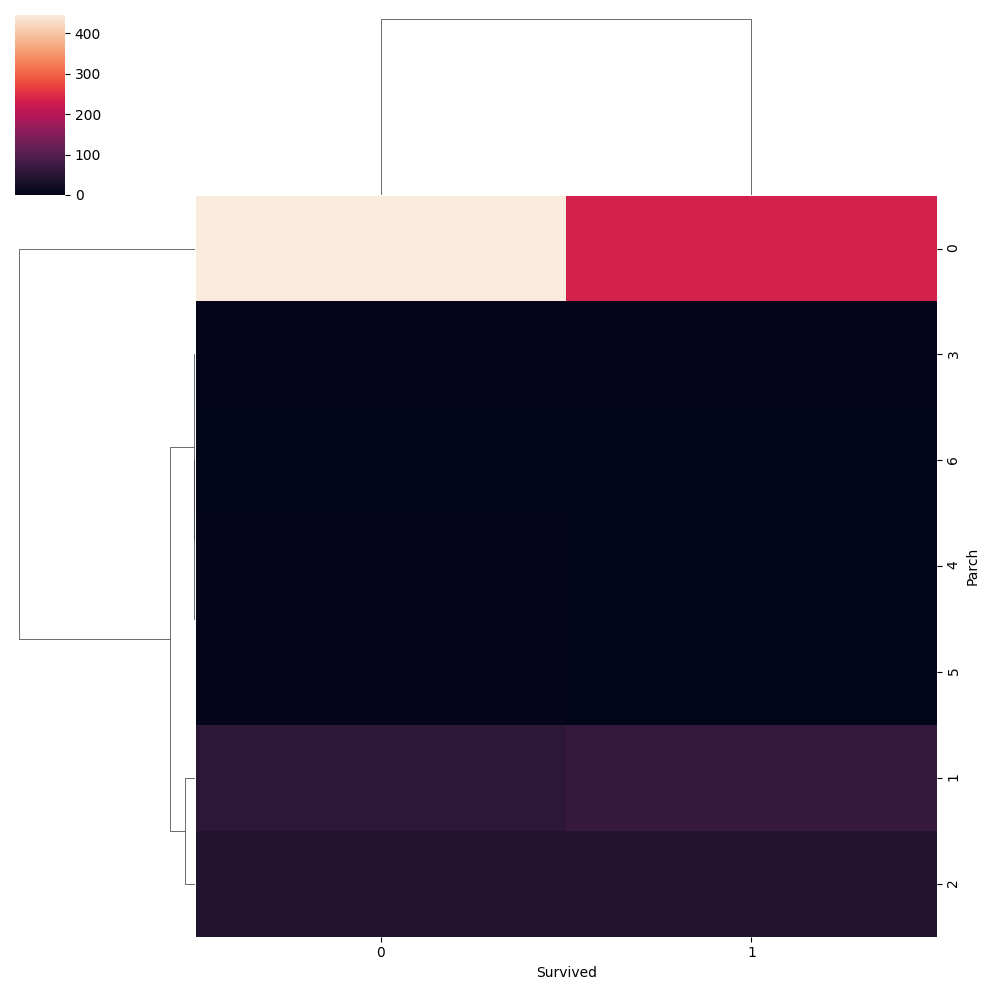

In [44]:
sns.clustermap(pd.crosstab(df['Parch'],df['Survived']))

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


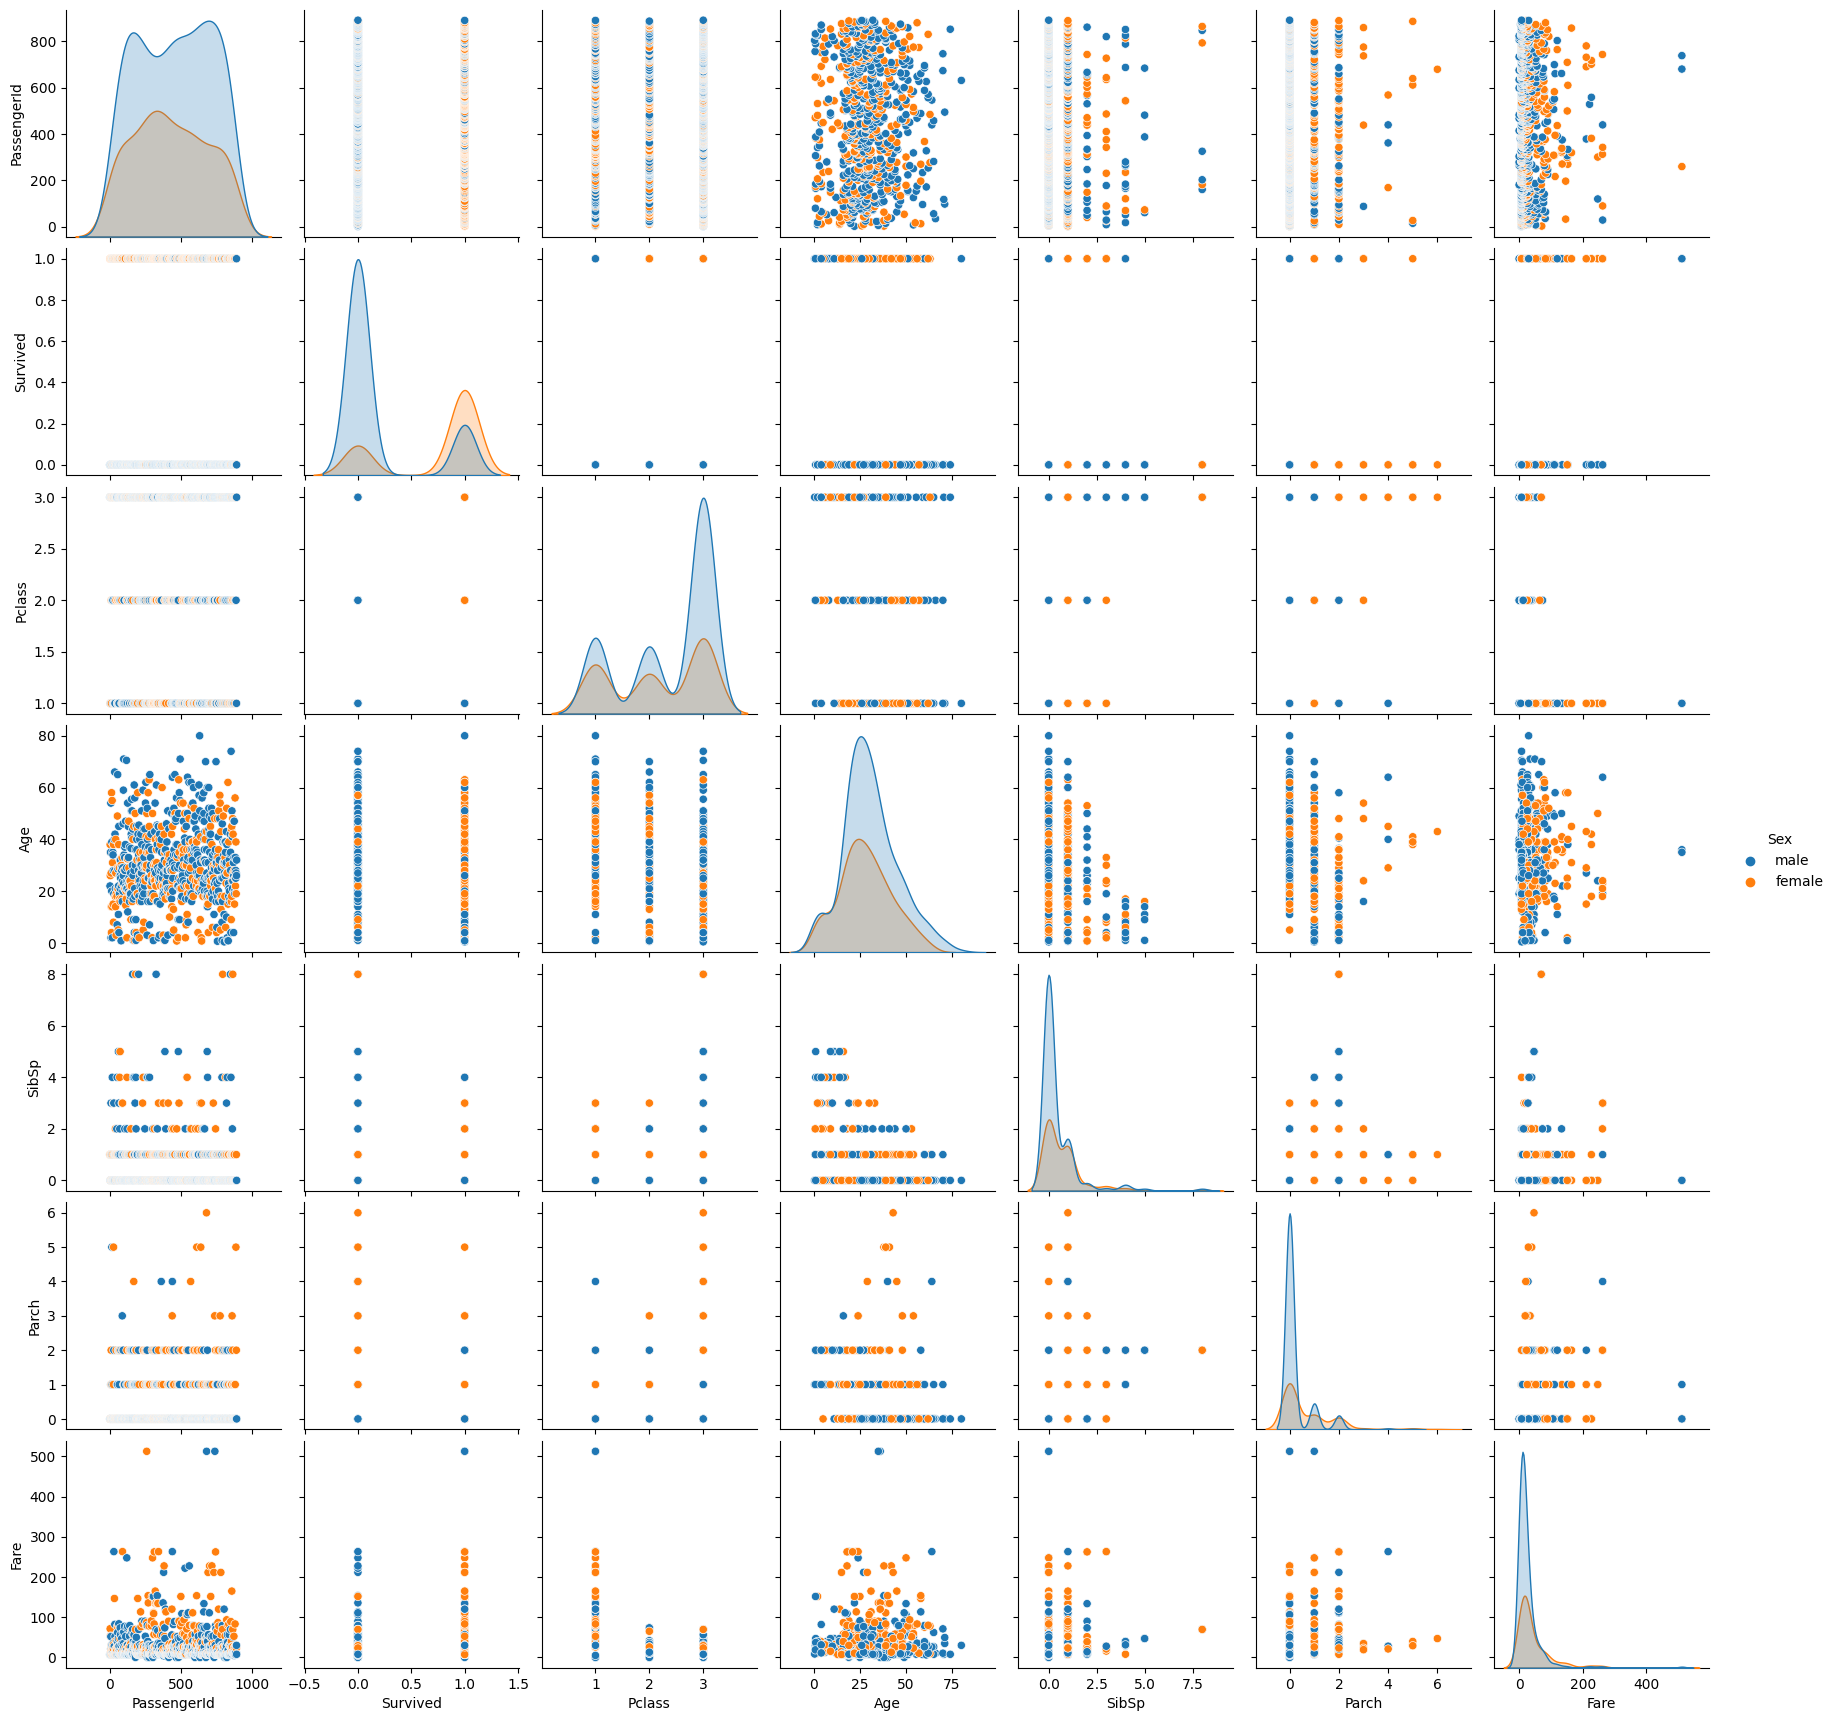

In [46]:
sns.pairplot(df,hue='Sex')